<a href="https://colab.research.google.com/github/ranjith13119/CNN/blob/main/Bacis%20Model_Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np 

In [ ]:
!pip uninstall tensorflow

In [ ]:
!pip install tensorflow==2.1.0

In [ ]:
!unzip '/content/drive/MyDrive/CNN/face-mask-dataset.zip' -d '/content/drive/MyDrive/CNN/face-mask-dataset'

In [ ]:
!unzip '/content/drive/MyDrive/CNN/face-mask-dataset/Dataset/test.zip' -d '/content/drive/MyDrive/CNN/face-mask-dataset/Dataset/test'
!unzip '/content/drive/MyDrive/CNN/face-mask-dataset/Dataset/train.zip' -d '/content/drive/MyDrive/CNN/face-mask-dataset/Dataset/train'

In [ ]:
# from tensorflow.keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
# model = Sequential([
#     Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3), kernel_initializer='he_uniform' ,padding='same'),
#     MaxPooling2D(2,2),
#     BatchNormalization(),
#     Dropout(.2),
#     Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
#     MaxPooling2D(2,2),
#     BatchNormalization(),
#     Dropout(.2),
#     Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
#     MaxPooling2D(2,2), 
#     BatchNormalization(),
#     Dropout(.2),   
#     Flatten(),
#     Dropout(0.2),
#     Dense(50, activation='relu', kernel_initializer='he_uniform'),
#     Dropout(0.5),
#     Dense(2, activation='softmax')
# ])

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model = Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
TRAINING_DIR = "/content/drive/MyDrive/CNN/face-mask-dataset/Dataset/train/train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
VALIDATION_DIR = "/content/drive/MyDrive/CNN/face-mask-dataset/Dataset/test/test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [ ]:
checkpoint = ModelCheckpoint('model4-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

In [ ]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [ ]:
model.save("/content/drive/MyDrive/CNN/he_uniform_Test.h5")

In [ ]:
import matplotlib.pyplot as plt
N = 10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [ ]:
!git clone https://github.com/opencv/opencv.git

Cloning into 'opencv'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 286403 (delta 0), reused 0 (delta 0), pack-reused 286402
Receiving objects: 100% (286403/286403), 476.23 MiB | 32.67 MiB/s, done.
Resolving deltas: 100% (200114/200114), done.
Checking out files: 100% (6688/6688), done.


In [ ]:
!git clone https://github.com/sr6033/face-detection-with-OpenCV-and-DNN.git

Cloning into 'face-detection-with-OpenCV-and-DNN'...
remote: Enumerating objects: 34, done.
remote: Total 34 (delta 0), reused 0 (delta 0), pack-reused 34
Unpacking objects: 100% (34/34), done.


[INFO] loading face detector model...
[INFO] loading face mask detector model...
[INFO] computing face detections...
[[4.1486246e-08 1.0000000e+00]]
[[8.344974e-09 1.000000e+00]]
[[1.9531273e-26 1.0000000e+00]]


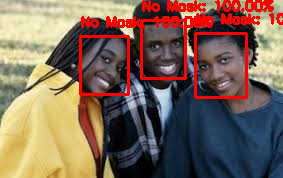

In [ ]:
# import the necessary libraries

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.models import load_model

import argparse

from google.colab.patches import cv2_imshow

from natsort import natsorted, ns

 
input_file_path = "/content/drive/MyDrive/CNN/images.jpg"
 
print("[INFO] loading face detector model...")

prototxtPath = "/content/opencv/samples/dnn/face_detector/deploy.prototxt"

weightsPath = "/content/face-detection-with-OpenCV-and-DNN/res10_300x300_ssd_iter_140000.caffemodel"

net = cv2.dnn.readNet(prototxtPath, weightsPath)

# load the face mask detector

print("[INFO] loading face mask detector model...")

model = load_model("/content/drive/MyDrive/CNN/he_uniform_2.1.0.h5")

def process_images(input_file_path):

  # load the input imag

  # dimensions

  image = cv2.imread(input_file_path)

  (h, w) = image.shape[:2]

 
  # construct a blob from the image

  blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),

    (104.0, 177.0, 123.0))

 # pass the blob through the network and obtain the face detections

  print("[INFO] computing face detections...")

  net.setInput(blob)

  detections = net.forward()

  # loop over the detections

  for i in range(0, detections.shape[2]):

    # extract the confidence associated with

    # the detection

    confidence = detections[0, 0, i, 2]

    # filter out weak detections by ensuring the confidence is

    # greater than the minimum confidence

    if confidence > 0.5:

      # compute the (x, y)-coordinates of the bounding box for

      # the object

      box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])

      (startX, startY, endX, endY) = box.astype("int")

      # ensure the bounding boxes fall within the dimensions of

      # the frame

      (startX, startY) = (max(0, startX), max(0, startY))

      (endX, endY) = (min(w - 1, endX), min(h - 1, endY))

      # extract the face ROI, convert it from BGR to RGB channel

      # ordering, resize it to 150x150, and preprocess it

      face = image[startY:endY, startX:endX]

      face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

      face = cv2.resize(face, (150, 150))

      face = img_to_array(face)

      face = preprocess_input(face)

      face = np.expand_dims(face, axis=0)

      # pass the face through the model to determine if the face

      # has a mask or not
      mask1 = model.predict(face) 
      print(mask1)
      (mask, withoutMask) = model.predict(face)[0]
      
      # determine the class label and color we'll use to draw

      # the bounding box and text

      label = "Mask" if mask > withoutMask else "No Mask"

      color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

   # include the probability in the label

      label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

      # display the label and bounding box rectangle on the output

      # frame

      #cv2.putText(image, label, (startX, startY - 10),
      cv2.putText(image, label, (startX, startY - 10),

        cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)

      cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)

  # show the output image

  save_path = input_file_path.split(".",1)

  cv2_imshow(image)

#start the process

process_images(input_file_path)

In [ ]:
import cv2
import numpy as np
from keras.models import load_model
model=load_model("/content/model3-010.model")
from google.colab.patches import cv2_imshow

results={0:'without mask',1:'mask'}
GR_dict={0:(0,0,255),1:(0,255,0)}

rect_size = 4
cap = cv2.VideoCapture('/content/Video/osy_test.mp4') 

In [ ]:
print(cap)

<VideoCapture 0x7f14fe1b7270>


In [ ]:
haarcascade = cv2.CascadeClassifier('/content/drive/MyDrive/CNN/haarcascade_frontalface_default.xml')

count = 1
while cap.isOpened() & count<30:
    #(rval, im) = cap.read()
    #im=cv2.flip(im,1,1) 
    #print(im)
    
    #rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    ret, im = cap.read() 
    print(im) 
    faces = haarcascade.detectMultiScale(im) 
    #faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 
        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(150,150))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)

        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)

    cv2_imshow(im)
    key = cv2.waitKey(10)
    
    if key == 27: 
        break

cap.release()

cv2.destroyAllWindows()

None


AttributeError: ignored

In [ ]:
videofile = get_video()
print(video_file_test)
with open(video_file_test, 'wb') as f:
  f.write(videofile)

/content/Video/osy_test.mp4


TypeError: ignored

In [ ]:
videofile

In [ ]:
!pip install ffmpeg-python


from IPython.display import HTML, Javascript, display
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
import ffmpeg

video_file_test = '/content/Video/osy_test.mp4' 
  

VIDEO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var my_btn_txt = document.createTextNode("Press to start recording");
my_btn.appendChild(my_btn_txt);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);
var base64data = 0;
var reader;
var recorder, videoStream;
var recordButton = my_btn;
var handleSuccess = function(stream) {
  videoStream = stream;
  var options = {  
    mimeType : 'video/webm;codecs=vp9'  
  };            
  recorder = new MediaRecorder(stream, options);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('video');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);
    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
    }
  };
  recorder.start();
  };
recordButton.innerText = "Recording... press to stop";
navigator.mediaDevices.getUserMedia({video: true}).then(handleSuccess);
function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      videoStream.getVideoTracks()[0].stop();
      recordButton.innerText = "Saving the recording... Please wait!"
  }
}
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}
var data = new Promise(resolve=>{
recordButton.onclick = ()=>{
toggleRecording()
sleep(2000).then(() => {
  // wait 2000ms for the data to be available
  resolve(base64data.toString())
});
}
});
      
</script>
"""

def start_webcam():
  js = Javascript('''
    async function startWebcam() {
      const div = document.createElement('div');
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      
      return;
    }
    ''')
  
  display(js)
  data = eval_js('startWebcam()')
  
    
start_webcam()

def get_video():
  display(HTML(VIDEO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  

<IPython.core.display.Javascript object>